# Automated IQM Evaluation of Stream Files


In [ ]:
from automate_evaluation import automate_evaluation

stream_file_folder = "/home/bubl3932/files/UOX1/UOX1_original_IQM_v3"   # Folder with stream file results from indexamajig. 
                                                                        # Note that all stream files in the folder will be processed.

weights_list = [
    (1, 1, 1, 1, 1, 1)
]

"""
Each weight corresponds to one of the six metrics used in calculating the combined IQM value.
The combined IQM is computed by first normalizing each metric across all stream files, then 
multiplying each normalized metric by its assigned weight, and finally summing the results.
The order (or keys) of the weights must match the following metrics:

- 'weighted_rmsd'
- 'fraction_outliers'
- 'length_deviation'
- 'angle_deviation'
- 'peak_ratio'
- 'percentage_indexed'

Multiple weight combinations can be specified if needed.
"""

automate_evaluation(stream_file_folder, weights_list)


Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-511.9_-511.9.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-512.1_-512.0.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-512.0_-511.9.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-512.0_-512.1.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-512.1_-512.1.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-512_-512.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-511.9_-512.0.stream as it appears to have been processed already.
Skipping /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/UOX1_-511.9_-512.1.stream as it appears to have been

Processing chunks in UOX1_-512.1_-512.1.stream: 100%|██████████| 6280/6280 [06:11<00:00, 16.92chunk/s]


Combined metrics CSV written to /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/metric_values_IQM_1_1_1_1_1_1.csv
Best results stream file written to /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/merged_IQM_1_1_1_1_1_1.stream


Mean combined_metric: -0.0012
Standard deviation: 3.1284
Cutoff threshold (mean + 1.0 std): 3.1272
Event numbers (491) and combined metric values above the cutoff threshold:
Event 100-1: Combined Metric = 9.5954
Event 10008-1: Combined Metric = 3.3759
Event 10022-1: Combined Metric = 3.3866
Event 10054-1: Combined Metric = 11.5401
Event 10063-1: Combined Metric = 5.1759
Event 10064-1: Combined Metric = 4.5968
Event 10187-1: Combined Metric = 3.8075
Event 10192-1: Combined Metric = 4.6815
Event 10208-1: Combined Metric = 7.7085
Event 10216-1: Combined Metric = 3.3349
Event 10332-1: Combined Metric = 4.7258
Event 10437-1: Combined Metric = 6.9322
Event 10453-1: Combined Metric = 4.2275
Event 10524-1: Combined Metric = 8.7575
Event 10543-1: Combined Metric = 3.3301
Event 10556-1: Combined Metric = 4.9741
Event 10564-1: Combined Metric = 4.3441
Event 10566-1: Combined Metric = 5.9678
Event 10571-1: Combined Metric = 11.1322
Event 1059-1: Combined Metric = 3.4496
Event 10695-1: Combined Met

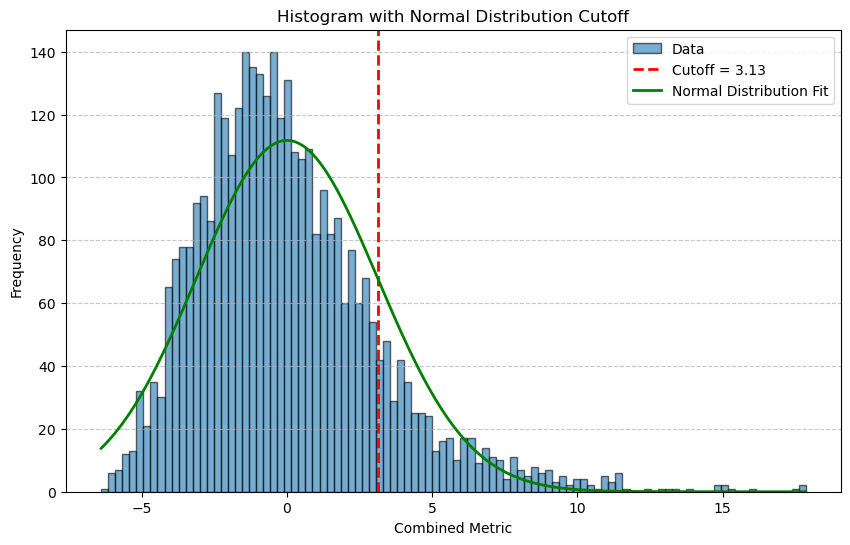

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  # optional, if you want to plot the fitted PDF

stream_file_folder = "/home/bubl3932/files/UOX1/UOX1_original_IQM_v3"   # Folder with stream file results from indexamajig. 
                                                                        # Note that all stream files in the folder will be processed.

weights_list = [
    (1, 1, 1, 1, 1, 1)
]

# Load your data
weights_string = "_".join(map(str, weights_list[0]))
csv_path = f"{stream_file_folder}/metric_values_IQM_{weights_string}.csv"
df = pd.read_csv(csv_path)

# Group by event_number and get the minimum combined_metric for each event.
grouped_series = df.groupby("event_number")["combined_metric"].min()

# Compute statistics of the combined_metric
mean_metric = grouped_series.mean()
std_metric = grouped_series.std()
std_multiplier = 1.0  # you can change this multiplier to adjust the cutoff threshold

# Define cutoff as mean + (std_multiplier * standard deviation)
cutoff = mean_metric + std_multiplier * std_metric
print(f"Mean combined_metric: {mean_metric:.4f}")
print(f"Standard deviation: {std_metric:.4f}")
print(f"Cutoff threshold (mean + {std_multiplier} std): {cutoff:.4f}")

# Identify events with a combined_metric above the cutoff threshold.
cutoff_series = grouped_series[grouped_series > cutoff]
cutoff_events = cutoff_series.index.tolist()
cutoff_metrics = cutoff_series.values.tolist()

cutoff_number = len(cutoff_events)

print(f"Event numbers ({cutoff_number}) and combined metric values above the cutoff threshold:")
for event, metric in zip(cutoff_events, cutoff_metrics):
    print(f"Event {event}: Combined Metric = {metric:.4f}")

# Optionally, write out the events that exceed the cutoff threshold to a CSV file.
output_df = pd.DataFrame({
    "event_number": cutoff_events,
    "combined_metric": cutoff_metrics
})
output_csv_path = f"{stream_file_folder}/cutoff_events_with_metric_values_IQM_{weights_string}.csv"
output_df.to_csv(output_csv_path, index=False)
print(f"\nCut-off Event and their metrics have been written to: {output_csv_path}")

# Plot the histogram of the data with the cutoff threshold indicated.
plt.figure(figsize=(10, 6))
plt.hist(grouped_series.values, bins=100, edgecolor='black', alpha=0.6, label='Data')
plt.axvline(cutoff, color='red', linestyle='dashed', linewidth=2, label=f'Cutoff = {cutoff:.2f}')

# Optionally, overlay the fitted normal distribution curve.
x_values = np.linspace(grouped_series.min(), grouped_series.max(), 1000)
pdf_values = norm.pdf(x_values, loc=mean_metric, scale=std_metric)
# Scale the PDF to match the histogram
bin_width = (grouped_series.max() - grouped_series.min()) / 100.0
pdf_values_scaled = pdf_values * len(grouped_series) * bin_width
plt.plot(x_values, pdf_values_scaled, color='green', linewidth=2, label='Normal Distribution Fit')

plt.title("Histogram with Normal Distribution Cutoff")
plt.xlabel("Combined Metric")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Running Partialator for Stream File Merging

In [ ]:
from run_partialator_and_convert import run_partialator_and_convert

stream_file = "/home/bubl3932/files/UOX1/UOX1_original_IQM_v3/merged_IQM_1_1_1_1_1_1.stream" # Stream file to be merged
pointgroup = "mmm"
num_threads = 24
iterations = 1

output_dir = run_partialator_and_convert(
    stream_file,
    pointgroup=pointgroup,
    num_threads=num_threads,
    iterations=iterations,
)

if output_dir is not None:
    print("All done. Results are in:", output_dir)


Running partialator for stream file: /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/merged_IQM_1_1_1_1_1_1.stream


Partialator Progress: 100%|██████████| 3/3 [01:01<00:00, 20.45s/Residuals]

Partialator completed for stream file: /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/merged_IQM_1_1_1_1_1_1.stream
All done. Results are in: /home/bubl3932/files/UOX1/UOX1_original_IQM_v3/merged_IQM_1_1_1_1_1_1_merge_1_iter
